# import Libraries

In [229]:
import tensorflow as tf
import os
import numpy as np
import cv2
import imghdr
import matplotlib
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define the Dataset class

In [230]:
DataDir = 'image data'
ImageEx = ['jpeg', 'jpg', 'bmp', 'png']

In [231]:
print(os.listdir(DataDir))
print(os.listdir(os.path.join(DataDir, 'Beyonce',)))

['Beyonce', 'JackieChan', 'Messi', 'Rihanna']
['00-story-beyonce-5-things.jpg', '01beyonce-item-mobileMasterAt3x.jpg', '0x0.jpg', '1169175.jpg', '1659416561-beyonce-AP.jpg', '200531232831-beyonce-london-2019.jpg', '220613-Beyonce-al-1031-3834b9.jpg', '619e37f3a0209c4d9ec736ae83c8090d--beyonce-hair-color-beyonce-blonde-hair.jpg', '68cd9636bbf57d460cf08a527d396557.jpeg', '960x0.jpg', 'a-birthday-shout-out-from-beyonce-complete-with-a-throwback-photo-1628162387.jpg', 'beyonc-c3-a9-accepts-the-best-dance-electronic-music-album-award-news-photo-1675652889.jpg', 'beyonc-c3-a9-attends-the-atlantis-the-royal-grand-reveal-weekend-news-photo-1674462721.jpg', 'BeyoncC3A9_at_The_Lion_King_European_Premiere_2019.png', 'Beyonce-1200-1.jpg', 'BEYONCE-2.jpg', 'beyonce-2023-billboard-1548.jpg', 'beyonce-and-jay-z-date-night-9003249182869256140851..jpg', 'Beyonce-cr-Courtesy-of-Parkwood-Entertainment-press-2022-billboard-1548.jpg', 'beyonce-fake-albums-on-spotify.jpg', 'beyonce-grammys-1675876501.jpg', 

In [232]:
for image_class in os.listdir(DataDir):
    for image in os.listdir(os.path.join(DataDir,image_class)):
        print(image)

total_images = 0  # initialize counter variable
for image_class in os.listdir(DataDir):
    for image in os.listdir(os.path.join(DataDir, image_class)):
        total_images += 1  # increment counter for each file
print("Total number of images:", total_images)

00-story-beyonce-5-things.jpg
01beyonce-item-mobileMasterAt3x.jpg
0x0.jpg
1169175.jpg
1659416561-beyonce-AP.jpg
200531232831-beyonce-london-2019.jpg
220613-Beyonce-al-1031-3834b9.jpg
619e37f3a0209c4d9ec736ae83c8090d--beyonce-hair-color-beyonce-blonde-hair.jpg
68cd9636bbf57d460cf08a527d396557.jpeg
960x0.jpg
a-birthday-shout-out-from-beyonce-complete-with-a-throwback-photo-1628162387.jpg
beyonc-c3-a9-accepts-the-best-dance-electronic-music-album-award-news-photo-1675652889.jpg
beyonc-c3-a9-attends-the-atlantis-the-royal-grand-reveal-weekend-news-photo-1674462721.jpg
BeyoncC3A9_at_The_Lion_King_European_Premiere_2019.png
Beyonce-1200-1.jpg
BEYONCE-2.jpg
beyonce-2023-billboard-1548.jpg
beyonce-and-jay-z-date-night-9003249182869256140851..jpg
Beyonce-cr-Courtesy-of-Parkwood-Entertainment-press-2022-billboard-1548.jpg
beyonce-fake-albums-on-spotify.jpg
beyonce-grammys-1675876501.jpg
Beyonce-Grammys-2023.jpg
beyonce-ivy-park.jpg
beyonce-knowles-los-angeles-ca-august-mtv-video-music-awards-for

In [233]:
total_images = 0  # initialize counter variable
removed_images = 0  # initialize counter variable for removed images
for image_class in os.listdir(DataDir):
    for image in os.listdir(os.path.join(DataDir, image_class)):
        ImagePath = os.path.join(DataDir, image_class,image)
        try:
            DImage = cv2.imread(ImagePath)
            ImaS = imghdr.what(ImagePath)
            if ImaS not in ImageEx:
                print('Image not in extension list {}'.format(ImagePath))
                os.remove(ImagePath)
                removed_images += 1  # increment counter for each removed file
        except Exception as e:
            print('Issue with image {}'.format(ImagePath))
            # os.remove(ImagePath)  # Uncomment this if you want to remove the problematic images
        total_images += 1  # increment counter for each file

In [234]:
print("Total number of images found:", total_images)

Total number of images found: 353


In [235]:
print("Total number of images removed:", removed_images)

Total number of images removed: 0


# preprocessing the images

In [236]:
ImageData = tf.keras.utils.image_dataset_from_directory('image data', )
print(ImageData)

Found 353 files belonging to 4 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [237]:
# data image iterator is ImageItr
ImageItr = ImageData.as_numpy_iterator()
try:
    Imagebatch = ImageItr.next()
    print(Imagebatch[1].shape)
except StopIteration:
    pass


(32,)


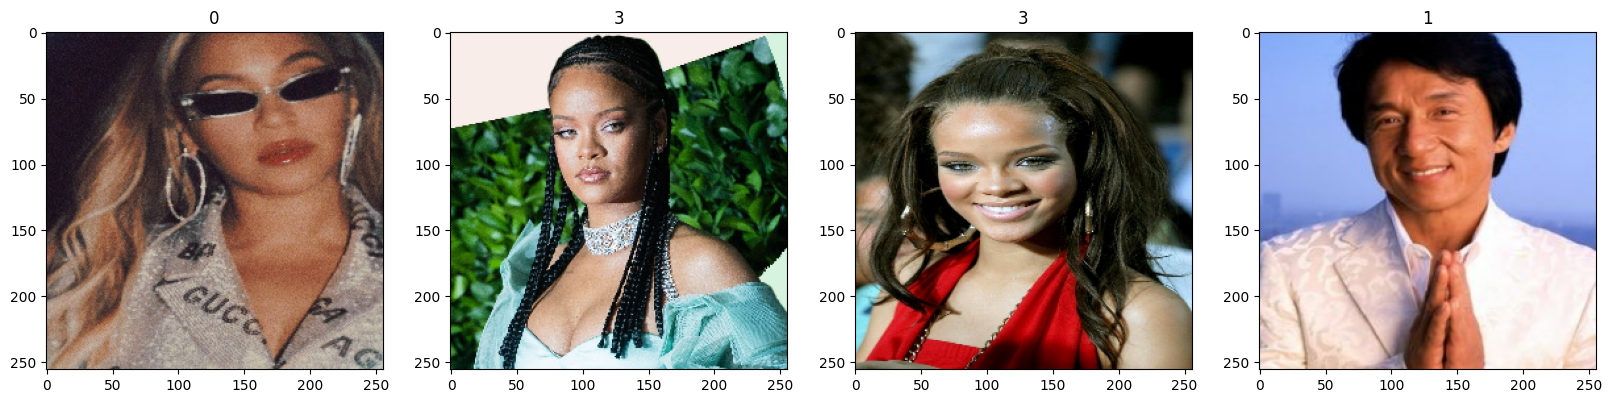

In [238]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, DImage in enumerate(Imagebatch[0][:4]):
        ax[idx].imshow(DImage.astype(int))
        ax[idx].title.set_text(Imagebatch[1][idx])

plt.show()

#preprocessing the data

In [239]:
ImageData = tf.keras.utils.image_dataset_from_directory('Image data')


Found 353 files belonging to 4 classes.


In [240]:
ImageData = ImageData.as_numpy_iterator().next()


In [241]:
x_train, y_train = ImageData
ImageData = tf.data.Dataset.from_tensor_slices((x_train / 255, y_train))


In [242]:
ImageData.as_numpy_iterator().next()

(array([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        ...,
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],
 
        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=float32),
 3)

# Check the range of the data after scaling

In [243]:
print(ImageData.as_numpy_iterator().next()[0].max())
print(ImageData.as_numpy_iterator().next()[0].min())

1.0
0.0


# Display a few images from the dataset

In [244]:
scaled_iterator = ImageData.as_numpy_iterator()
Thebatch = scaled_iterator.next()

# set the sizes for the train, validation, and test sets

In [245]:
TrainSize = int(len(ImageData)*1)-10
ValSize = int(len(ImageData)*.0)+7
TestSize = int(len(ImageData)*.0)+3

# load the image dataset

In [246]:
Idata = tf.keras.preprocessing.image_dataset_from_directory(
    'Image data',
    batch_size=8,
    image_size=(256, 256),
    validation_split=0.3,
    subset='training',
    seed=123
)

Found 353 files belonging to 4 classes.
Using 248 files for training.


In [247]:
print('Training Size=', TrainSize)

Training Size= 22


In [248]:
print('Validation Size=', ValSize)

Validation Size= 7


In [249]:
print('Test Size=', TestSize)

Test Size= 3


In [250]:
print('Total Size=', TrainSize + ValSize + TestSize)

Total Size= 32


In [251]:
# the skip and take tensorflow function is used so the data from the training won't appear in the validation or test set
Train = Idata.take(TrainSize)
Val = Idata.skip(TrainSize).take(ValSize)
Test = Idata.skip(TrainSize+ValSize).take(TestSize)

In [252]:
len(Train)

22

In [253]:
len(Val)

7

In [254]:
len(Test)

2

# building the model

In [255]:
IModel = Sequential()
IModel.add(Conv2D(8, (3, 3), 2, activation='relu', input_shape=(256, 256, 3)))
IModel.add(MaxPooling2D())
IModel.add(Conv2D(16, (3, 3), 2, activation='relu'))
IModel.add(MaxPooling2D())
IModel.add(Conv2D(8, (3, 3), 2, activation='relu'))
IModel.add(MaxPooling2D())
IModel.add(Flatten())
IModel.add(Dense(256, activation='relu'))
IModel.add(Dense(4, activation='softmax'))

In [256]:
# i used less filter for it to be faster at the expense of accuracy and the stride of 2 instead of 1 for speed over accuracy
# If you have 4 classes of images to classify, you should use Dense(4, activation='softmax') instead of Dense(1, activation='sigmoid') in your final layer.
# The softmax activation function is typically used for multi-class classification problems and produces a probability distribution over the different classes.
# The output of the softmax layer will be a vector of length 4, with each element representing the probability of the corresponding class.


# compile model

In [257]:
IModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# print model summary

In [258]:
print(IModel.summary)

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000001F925823940>>


In [259]:
LogDir = 'ImageLogs'

In [260]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LogDir)

In [261]:
print(Val)

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [262]:
hist = IModel.fit(Train, epochs=35, validation_data= Val, callbacks=[tensorboard_callback])

Epoch 1/35
22/22 [==============================] - 8s 312ms/step - loss: 8.4638 - accuracy: 0.3011 - val_loss: 2.6221 - val_accuracy: 0.1964
Epoch 2/35
22/22 [==============================] - 7s 300ms/step - loss: 1.7755 - accuracy: 0.3352 - val_loss: 1.4477 - val_accuracy: 0.3036
Epoch 3/35
22/22 [==============================] - 7s 302ms/step - loss: 1.2506 - accuracy: 0.5227 - val_loss: 1.4036 - val_accuracy: 0.3393
Epoch 4/35
22/22 [==============================] - 8s 341ms/step - loss: 1.0704 - accuracy: 0.5341 - val_loss: 1.2596 - val_accuracy: 0.4821
Epoch 5/35
22/22 [==============================] - 8s 347ms/step - loss: 0.8977 - accuracy: 0.6477 - val_loss: 1.1754 - val_accuracy: 0.5179
Epoch 6/35
22/22 [==============================] - 9s 354ms/step - loss: 0.8300 - accuracy: 0.6591 - val_loss: 1.0905 - val_accuracy: 0.5714
Epoch 7/35
22/22 [==============================] - 7s 300ms/step - loss: 0.7299 - accuracy: 0.7500 - val_loss: 0.7875 - val_accuracy: 0.6964
Epoch 

In [263]:
hist.history

{'loss': [8.463821411132812,
  1.7755331993103027,
  1.2505686283111572,
  1.0704197883605957,
  0.8976757526397705,
  0.8300104737281799,
  0.7299404144287109,
  0.6322841644287109,
  0.5442491769790649,
  0.4359711706638336,
  0.513520359992981,
  0.46020224690437317,
  0.4649294912815094,
  0.46762821078300476,
  0.35681021213531494,
  0.29229116439819336,
  0.19596999883651733,
  0.13950768113136292,
  0.15372270345687866,
  0.12040941417217255,
  0.08400049805641174,
  0.06946232914924622,
  0.07663333415985107,
  0.07378344982862473,
  0.16095910966396332,
  0.11934009194374084,
  0.07603992521762848,
  0.05809701979160309,
  0.04891028255224228,
  0.03986359015107155,
  0.02807483822107315,
  0.018948735669255257,
  0.018884604796767235,
  0.01113145798444748,
  0.01198553666472435],
 'accuracy': [0.3011363744735718,
  0.33522728085517883,
  0.5227272510528564,
  0.5340909361839294,
  0.6477272510528564,
  0.6590909361839294,
  0.75,
  0.7840909361839294,
  0.8011363744735718,
 

# Graph of the history

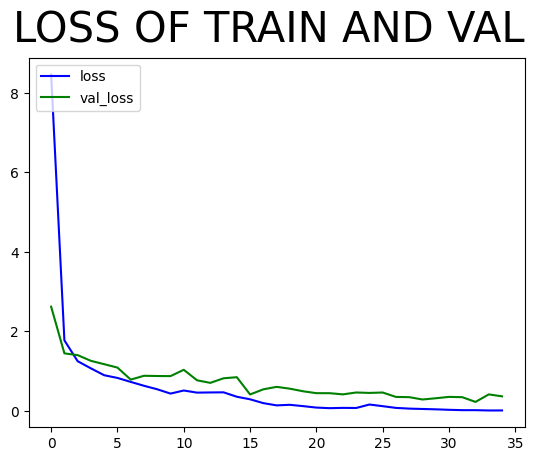

In [267]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
fig.suptitle('LOSS OF TRAIN AND VAL', fontsize=30)
plt.legend(loc="upper left")
plt.show()

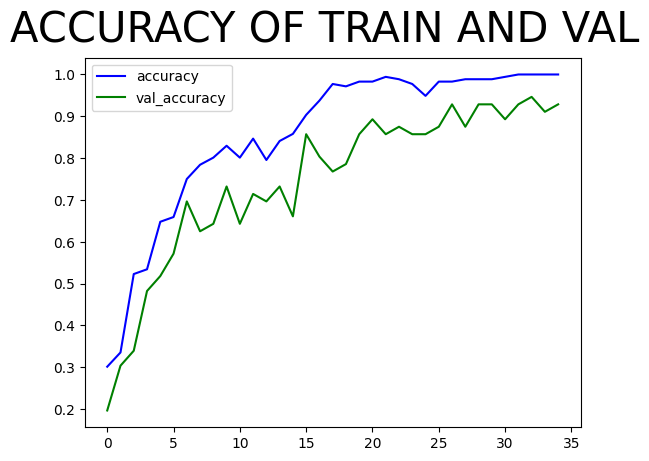

In [268]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('ACCURACY OF TRAIN AND VAL', fontsize=30)
plt.legend(loc="upper left")
plt.show()

# EVALUATION

In [266]:
# evaluate the model on the test set
Test_loss, Test_accuracy = IModel.evaluate(Test)

print("Test Loss:", Test_loss)
print("Test Accuracy:", Test_accuracy)


2/2 [==============================] - 4s 27ms/step - loss: 0.0775 - accuracy: 1.0000
Test Loss: 0.07749073207378387
Test Accuracy: 1.0


# SAVE THE MODEL

In [273]:
from tensorflow.keras.models import load_model

In [275]:
IModel.save(os.path.join('Models','ImageClassification.h5'))

# SAVE THE CLASSES

In [277]:
train_dir = 'Image data'
classes = sorted(os.listdir(train_dir))

In [279]:
print(classes)

['Beyonce', 'JackieChan', 'Messi', 'Rihanna']


In [278]:
class_dict = {}
for i, class_label in enumerate(classes):
    class_dict[class_label] = i


In [280]:
import json
with open('class_dict.json', 'w') as f:
    json.dump(class_dict, f)